In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading csv file

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
comments = pd.read_csv(r'/content/drive/MyDrive/UScomments.csv',on_bad_lines='skip')

<ipython-input-9-c87f67b230a9>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'/content/drive/MyDrive/UScomments.csv',on_bad_lines='skip')


In [10]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [11]:
## finding out missing values in your data
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [12]:
## droping missing values as we have very few
comments.dropna(inplace=True)

In [13]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Sentiment Analysis
    
   

In [ ]:
!pip install textblob

In [14]:
from textblob import TextBlob

In [15]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [20]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [21]:
len(polarity)

691374

In [22]:
comments['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [23]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Wordcloud Analysis

In [24]:
filter1 = comments['polarity']==1

In [25]:
comments_positive = comments[filter1]

In [26]:
filter2 = comments['polarity']==-1

In [27]:
comments_negative = comments[filter2]

In [28]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [ ]:
!pip install wordcloud

In [30]:
from wordcloud import WordCloud , STOPWORDS

In [31]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [32]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [33]:
type(comments['comment_text'])

pandas.core.series.Series

In [34]:
### for wordcloud , we need to frame our 'comment_text' feature into string
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [35]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

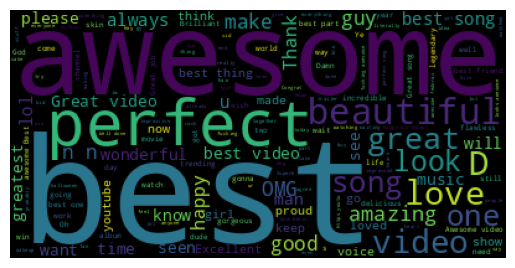

In [36]:
plt.imshow(wordcloud)
plt.axis('off')

### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [37]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [38]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

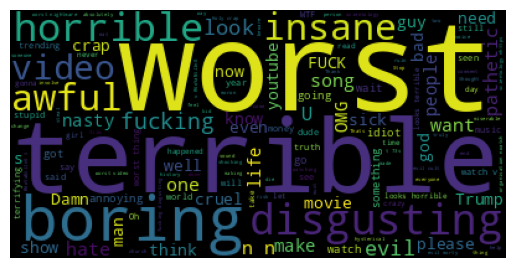

In [39]:
plt.imshow(wordcloud2)
plt.axis('off')

### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

## Emoji's Analysis

In [40]:
!pip install emoji==2.2.0 ## 2.2.0 is a most stable version till date , hence installing this version makes sense !

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=782f365e567cc0c511a029cef1908a9b76191a975809ac15fec4552601d76e9d
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [41]:
import emoji

In [42]:
emoji.__version__

'2.2.0'

In [43]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [44]:
comment = 'trending 😉'

In [45]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [46]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [47]:
emoji_list

['😉']

In [48]:
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [49]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [50]:
from collections import Counter

In [51]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [52]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [53]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [54]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [55]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [56]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [57]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [58]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [59]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [60]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [61]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [62]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [63]:
trace = go.Bar(x=emojis , y=freqs)

In [64]:
iplot([trace])

## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

## Collecting data!

In [65]:
import os

In [67]:
files= os.listdir(r'/content/drive/MyDrive/additional_data')

In [68]:
files

['JPvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'IN_category_id.json',
 'JP_category_id.json',
 'DEvideos.csv',
 'KR_category_id.json',
 'RUvideos.csv',
 'MX_category_id.json',
 'RU_category_id.json',
 'US_category_id.json',
 'CAvideos.csv',
 'KRvideos.csv',
 'GBvideos.csv',
 'MXvideos.csv',
 'USvideos.csv']

In [69]:
## extracting csv files only from above list ..

files_csv = [file for file in files if '.csv' in file]

In [70]:
files_csv

['JPvideos.csv',
 'FRvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'RUvideos.csv',
 'CAvideos.csv',
 'KRvideos.csv',
 'GBvideos.csv',
 'MXvideos.csv',
 'USvideos.csv']

In [71]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
full_df = pd.DataFrame()
path = r'/content/drive/MyDrive/additional_data'


for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1' , on_bad_lines='skip')

    full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [75]:
full_df.shape

(375942, 16)

## Analyzing the most liked Category

In [81]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...


In [82]:
full_df['category_id'].unique()

array([25,  1, 28, 22, 23, 19, 15, 24, 26,  2, 17, 29, 10, 20, 27, 43, 30,
       44])

In [84]:
json_df = pd.read_json(r'/content/drive/MyDrive/additional_data/US_category_id.json')

In [85]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [86]:
json_df['items'][0]

### each row of 'Items' feature is dictionary

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [88]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [89]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [90]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [91]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,News & Politics
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,Film & Animation
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,Science & Technology
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,News & Politics


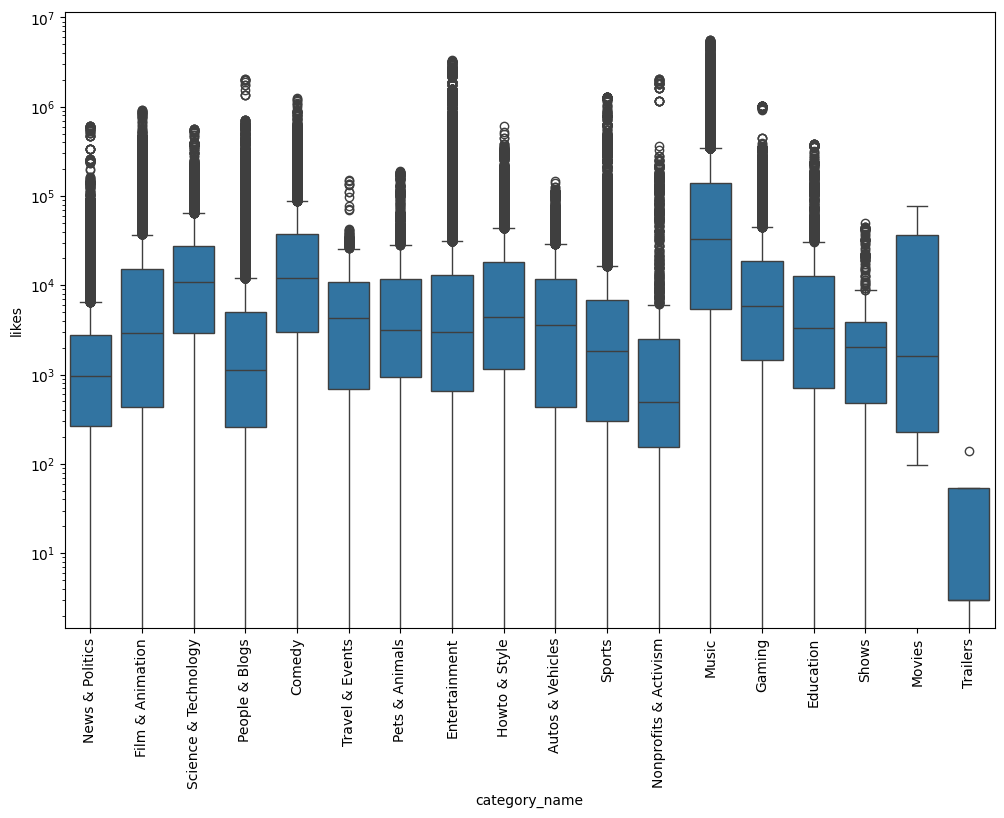

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.show()


## 8.. Audience Engagement

In [93]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [94]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

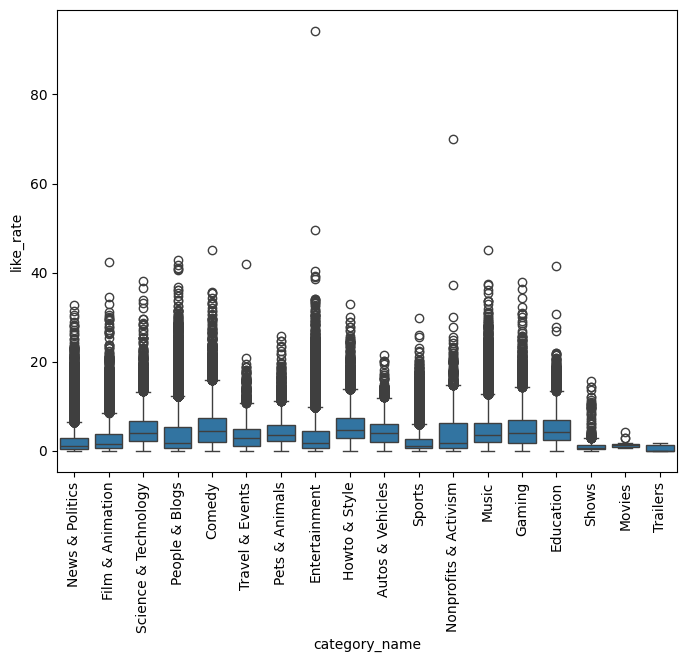

In [95]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

## Analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

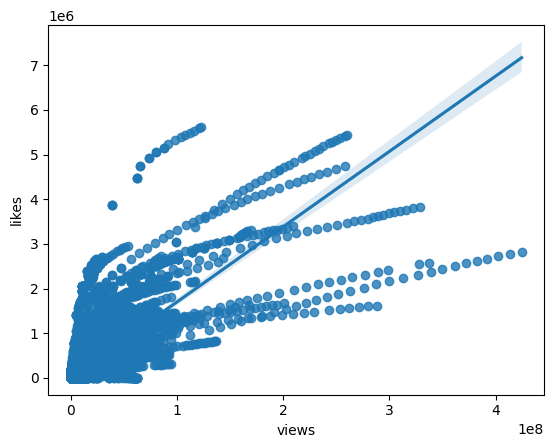

In [96]:
sns.regplot(x='views' , y='likes' , data = full_df)

In [97]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [98]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

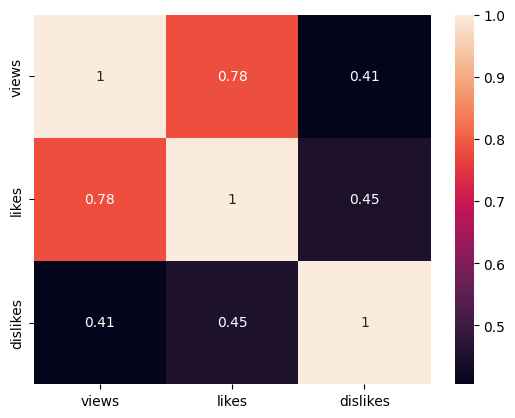

In [99]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

## Analyzing trending videos of You-tube

In [100]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,News & Politics,0.314220,0.100486,0.000000
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,Film & Animation,0.486094,0.096779,0.191358
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,Science & Technology,2.588704,0.036375,0.046908
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,News & Politics,1.210327,0.287777,0.566204
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...,Film & Animation,1.232381,0.068261,0.185411
5,OIDfjdGERr8,18.07.02,æè³ãã¤ãããã®æ­»å ãå å¤«ã»åç...,æ¿ç½ï¼ï¼ã¹ã¼ãã¼è¸è½ãã£ã³ãã«ï...,22,2018-02-06T03:27:10.000Z,"æè³ãã¤ã|""å «æ¨äºå¸å­""|""æ²³éæ¯å­...",193593,0,0,53,https://i.ytimg.com/vi/OIDfjdGERr8/default.jpg,False,True,False,Twitterå§ãã¾ããï¼\n\nç»é²ãããã...,People & Blogs,0.000000,0.000000,0.027377


In [101]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Desi Beats Records                      1
Rina Kot                                1
Castelofunk.com Official                1
BOTAY.COM                               1
Schiffe und Kreuzfahrten                1
Name: count, Length: 37824, dtype: int64

In [102]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [103]:
cdf = cdf.rename(columns={0:'total_videos'})

In [104]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [105]:
import plotly.express as px

In [106]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

## Impact of Punctuations on likes, dislikes, and comments.

In [107]:
full_df['title'][0]

'é\x99¸è\x87ªã\x83\x98ã\x83ªã\x80\x81å\x9e\x82ç\x9b´ã\x81«è\x90½ä¸\x8bï¼\x9dè·¯ä¸\x8aã\x81®è»\x8aã\x81\x8cæ\x92®å½±'

In [108]:
import string

In [109]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [110]:
len([char for char in full_df['title'][0] if char in string.punctuation])

0

In [111]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [112]:
sample = full_df[0:10000]

In [113]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [114]:
sample['count_punc']

0        0
1        0
2        0
3        0
4        0
        ..
13343    0
13344    0
13345    0
13346    2
13347    0
Name: count_punc, Length: 10000, dtype: int64

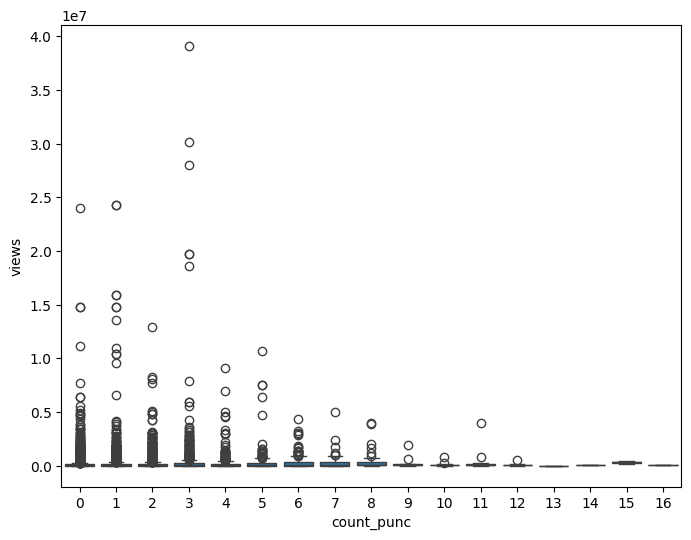

In [115]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

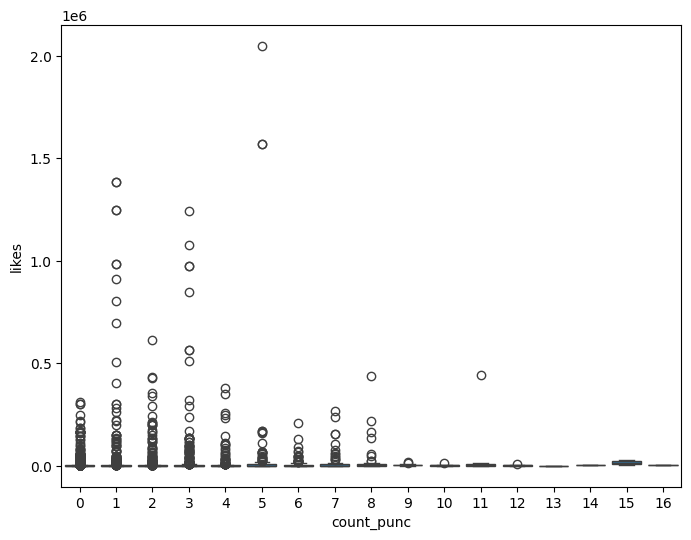

In [116]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()